# Project Analysis.

The problem question will involve Analysts Consultants. The company wants to establish a way to find out the leading causes of suicide in different countries in the world and how the economic aspects affect the rates of suicide. Through this, a proper model can be devised and recommended proper measures to be taken to reduce the rates of suicide rates globally. Using Data Science techniques, we will be scheming and planning towards a strategy to achieve reliable results.

Objectives.

To show how the economic aspects such as GDP affect the rates of suicide.

To obtain an overview of suicide rates over a specific period of time.

To show the distribution of suicide cases across the countries included in our data.


# IMPORTING LIBRARY

In [0]:
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt 
#import seaborn
import seaborn as sns

# LOADING OUR DATASETS

Our dataset represent the overview of global suicides from 101 random  selected Countries by WHO between 1985 to 2016

In [0]:
# Importing suicide dataset as csv
dataset=pd.read_csv('dataset.csv')
dataset.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
#Filtering our dataset for the  20 years.. between 1995 to 2015
dataset=dataset[(dataset['year']>=1995) & (dataset['year']<=2015)]
dataset

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


From the dataset we have 12 columns and 20734 obsevations(suicides), Age is grouped data and HDI has visiable null values


# PREVIEWING OUR DATASETS


In [0]:
#having an overview of dataset.csv
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             20736 non-null  object 
 1   year                20736 non-null  int64  
 2   sex                 20736 non-null  object 
 3   age                 20736 non-null  object 
 4   suicides_no         20736 non-null  int64  
 5   population          20736 non-null  int64  
 6   suicides/100k pop   20736 non-null  float64
 7   country-year        20736 non-null  object 
 8   HDI for year        7320 non-null   float64
 9    gdp_for_year ($)   20736 non-null  object 
 10  gdp_per_capita ($)  20736 non-null  int64  
 11  generation          20736 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.1+ MB


In [0]:
 #having an description of our data
dataset.describe()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,20736.000000,20736.000000,2.073600e+04,20736.000000,7320.000000,20736.000000
mean,2004.951968,242.645158,1.840837e+06,12.777142,0.786282,19229.436921
std,5.897657,917.643345,3.970192e+06,19.102246,0.090211,20512.832767
min,1995.000000,0.000000,2.780000e+02,0.000000,0.513000,291.000000
25%,2000.000000,3.000000,9.839400e+04,0.940000,0.721000,4137.250000
50%,2005.000000,24.000000,4.341400e+05,5.790000,0.787000,11353.500000
75%,2010.000000,126.000000,1.477856e+06,16.360000,0.866000,28900.000000
max,2015.000000,21706.000000,4.380521e+07,224.970000,0.944000,126352.000000


# DATA CLEANING.

# **1). Validity**

In [0]:
#Dropping unnecessary columns
dataset=dataset.drop(['country-year','generation','HDI for year'],axis=1)
dataset

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309


# 2). Completeness

In [0]:
#checking the number of null values per column
dataset.isnull().sum()

#NO NULL VALUES FOUND



country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
dtype: int64

## 3). Consistency 



In [0]:
# Here we check if our data has duplicates using the Consistency property
dataset.duplicated()
# We have no duplicates in our dataset

72       False
73       False
74       False
75       False
76       False
         ...  
27815    False
27816    False
27817    False
27818    False
27819    False
Length: 20736, dtype: bool

# 4). Uniformity

In [0]:
# CHANGING THE COLUMN NAMES.

dataset.columns = ['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicides/100k/pop',
       'GDP', 'per_capita']   
dataset.head()

,country,year,gender,age,suicides_no,population,suicides/100k/pop,GDP,per_capita
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835


In [0]:
#converting GDP TO INTERGER.
dataset['GDP'] = dataset['GDP'].str.replace(',','').astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 72 to 27819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            20736 non-null  object 
 1   year               20736 non-null  int64  
 2   gender             20736 non-null  object 
 3   age                20736 non-null  object 
 4   suicides_no        20736 non-null  int64  
 5   population         20736 non-null  int64  
 6   suicides/100k/pop  20736 non-null  float64
 7   GDP                20736 non-null  int64  
 8   per_capita         20736 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


# **DATA ANALYSIS**

## 1) **Number of suicides by gender and age**


,suicides_no,age
age,,
35-54 years,1865786,35-54 years
55-74 years,1234445,55-74 years
25-34 years,817679,25-34 years
15-24 years,597159,15-24 years
75+ years,477253,75+ years
5-14 years,39168,5-14 years


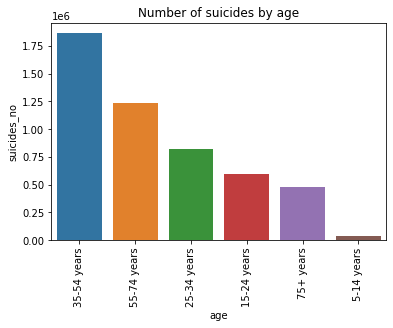

In [0]:
#calculating the mean of the number of suicides by age
age_suicide=dataset[['age','suicides_no']].groupby(by=['age']).sum().sort_values(by='suicides_no',ascending=0)
age_suicide['age']=age_suicide.index
sns.barplot(x='age',y='suicides_no',data=age_suicide).set_title('Number of suicides by age')
plt.xticks(rotation=90)
#Most suicides happen between the age of 35-50 years and the least at the age of 5-14 years
age_suicide

,suicides_no,gender
gender,,
female,1126123,female
male,3905367,male


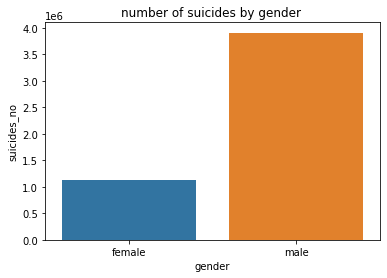

In [0]:
#calculating the number of suicides by gender
years=dataset[['gender','suicides_no']].pivot_table(values=['suicides_no'],index=(['gender']),aggfunc=np.sum)
#
years['gender']=years.index
sns.barplot(x='gender', y='suicides_no', data=years).set_title('number of suicides by gender ')
# MALE COMMITTED
years

## 2).**SUICIDES BY COUNTRY**

,suicides_no,country
country,,
Russian Federation,930323,Russian Federation
United States,727923,United States
Japan,589174,Japan
Ukraine,229956,Ukraine
Republic of Korea,227213,Republic of Korea
Germany,224462,Germany
France,209781,France
Brazil,177943,Brazil
Poland,111956,Poland


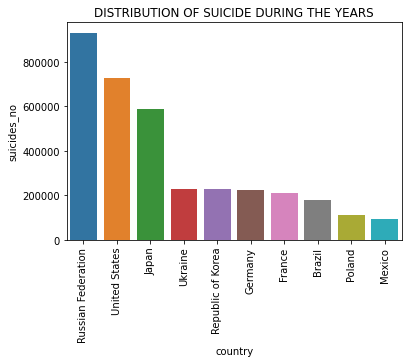

In [0]:
#finding the mean of suicides by country
country_suicides=dataset[['country','suicides_no']].pivot_table(values=['suicides_no'],index=(['country']),aggfunc=np.sum).sort_values(by='suicides_no',ascending=0).head(10)
country_suicides['country']=country_suicides.index
sns.barplot(x='country',y='suicides_no',data=country_suicides).set_title('DISTRIBUTION OF SUICIDE DURING THE YEARS')
plt.xticks(rotation=90)
#Russia, USA and Japan had the most number suicides
country_suicides

### 3).**DISTRIBUTION OF SUICIDE DURING THE YEARS AND SUICIDES PER 100K POPULATION**


,suicides_no,year
year,,
1995,243544,1995
1996,246725,1996
1997,240745,1997
1998,249591,1998
1999,256119,1999
2000,255832,2000
2001,250652,2001
2002,256095,2002
2003,256079,2003


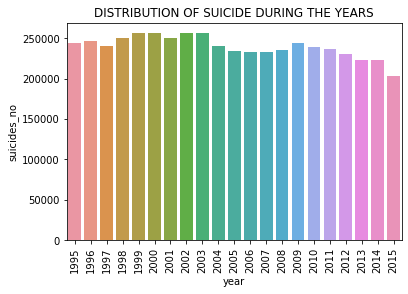

In [0]:
#calculating the mean of suicides and finding the distribution over the 20 years
years_suicide=dataset[['year','suicides_no']].groupby(['year']).sum().sort_values(by='year',ascending=1)
years_suicide['year']=years_suicide.index
sns.barplot(x='year',y='suicides_no',data=years_suicide).set_title('DISTRIBUTION OF SUICIDE DURING THE YEARS')
plt.xticks(rotation=90)
#for the last 20 years 2015 had the highest suicide rates  and 2016 was the least..
#its very important we notice a huge drop from 2015 to 2016
years_suicide.head(10)

,suicides/100k/pop,year
year,,
1995,14660.26,1995
1999,14473.91,1999
2000,14387.45,2000
2001,14276.21,2001
2002,14227.72,2002
1998,14150.72,1998
1996,14142.21,1996
1997,13817.83,1997
2003,13627.58,2003


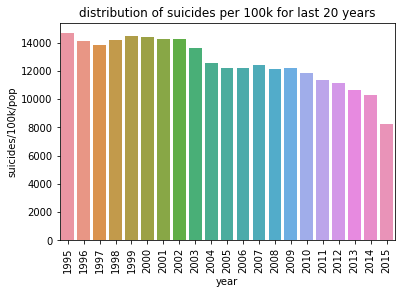

In [0]:
#finding the the distribution of suicides per 100k for last 20 years
pop=dataset[['suicides/100k/pop','year']].groupby(['year']).sum().sort_values(by='suicides/100k/pop',ascending=0)
pop['year']=pop.index
sns.barplot(x='year',y='suicides/100k/pop',data=pop).set_title('distribution of suicides per 100k for last 20 years')
plt.xticks(rotation=90)
pop.head(10)

# 4) .DISTRIBUTION OF SUICIDES BY GDP



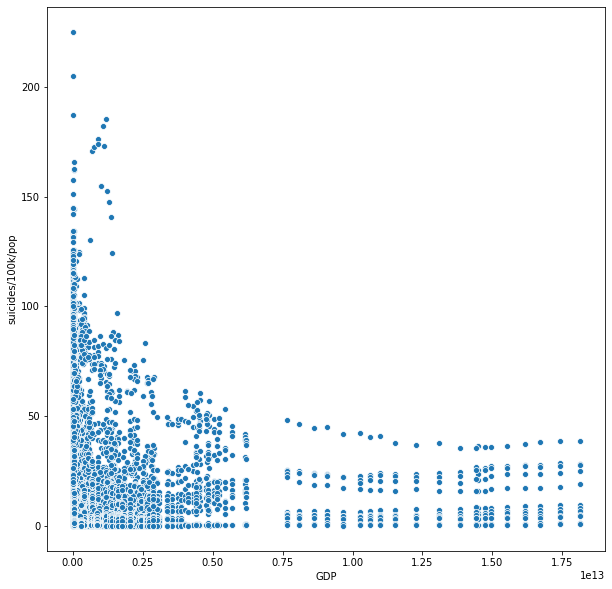

In [0]:

#CREATING A SCATTERPLOT TO SEE HOW THE SUICIDES ARE DISTRIBUTED in various GDP
data_gdp=dataset[['GDP','suicides/100k/pop']]
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_gdp,x='GDP',y='suicides/100k/pop')
# The lower the gdp the higher the suicides
#suicides were higher  for countries with low GDP

### 5).**CORRELATION OF DATA**

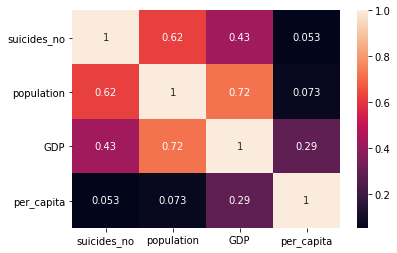

In [0]:
#Creating a data frame of values we need in the correlation
corr_data=dataset[['suicides_no','population','GDP','per_capita','age','gender']]
#correlation of data and visualize with a heatmap
_=sns.heatmap(corr_data.corr(),annot=True)
#our main focus is finding the correlation between suicide and economic aspects like GDP and Per_capita income
#Gdp and Suicides are positively correlated, with a 0.44, which is average  correlation.
# We can also see Per capita income have a positive correlation but a weak correlation.
#population have positive strong correlation with suicide rates, hence as the population increase the suicide rate of the country increases.
